In [20]:
import numpy as np
import pandas as pd
import urllib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import mlab
%matplotlib inline
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn.linear_model import LinearRegression as Lin_Reg

import urllib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import mlab

from mpl_toolkits.basemap import Basemap
import itertools
import plotly.plotly as py


In [5]:
### Load disease data

# Cancer
df_cancer = pd.read_csv('/Users/semiraykasoolu/Google Drive/You are what you eat/data/WHS2_131 Cancer.csv', delimiter=',')
df_cancer.columns = map(str.lower, df_cancer.columns)
df_cancer = df_cancer.rename(columns = {' both sexes':'cancer_all'})
df_cancer = df_cancer.rename(columns = {' female':'cancer_female'})
df_cancer = df_cancer.rename(columns = {' male':'cancer_male'})

# Cardiovascular
df_cardio = pd.read_csv('/Users/semiraykasoolu/Google Drive/You are what you eat/data/WHS2_131 Cardiovascular.csv', delimiter=',')
df_cardio.columns = map(str.lower, df_cardio.columns)
df_cardio = df_cardio.rename(columns = {' both sexes':'cardio_all'})
df_cardio = df_cardio.rename(columns = {' female':'cardio_female'})
df_cardio = df_cardio.rename(columns = {' male':'cardio_male'})

# Diabetes
df_diabetes = pd.read_csv('/Users/semiraykasoolu/Google Drive/You are what you eat/data/WHS2_131 Diabetes.csv', delimiter=',')
df_diabetes.columns = map(str.lower, df_diabetes.columns)
df_diabetes = df_diabetes.rename(columns = {' both sexes':'diabetes_all'})
df_diabetes = df_diabetes.rename(columns = {' female':'diabetes_female'})
df_diabetes = df_diabetes.rename(columns = {' male':'diabetes_male'})

In [6]:
df_cancer_2012 = df_cancer[df_cancer['year'] == 2012]
df_cardio_2012 = df_cardio[df_cardio['year'] == 2012]
df_diabetes_2012 = df_diabetes[df_cancer['year'] == 2012]

In [7]:
### Load food data
df_foodgrouped = pd.read_csv('/Users/semiraykasoolu/Google Drive/You are what you eat/data/Foodsupply_by_group.csv', delimiter=',')

In [8]:
# Column names
df_foodgrouped = df_foodgrouped.rename(columns = {'AreaName':'country'})
df_foodgrouped.columns

Index([u'Domain Code', u'Domain', u'AreaCode', u'country', u'ElementCode',
       u'ElementName', u'ItemCode', u'ItemName', u'Year', u'Value', u'Flag',
       u'FlagD'],
      dtype='object')

In [9]:
# Food categories
df_foodgrouped['ItemName'].unique()

array(['Cereals - Excluding Beer', 'Starchy Roots', 'Sugar & Sweeteners',
       'Pulses', 'Treenuts', 'Oilcrops', 'Vegetable Oils', 'Vegetables',
       'Fruits - Excluding Wine', 'Stimulants', 'Spices',
       'Alcoholic Beverages', 'Miscellaneous', 'Grand Total',
       'Vegetal Products', 'Sugar Crops', nan], dtype=object)

In [13]:
###----------Part 1: SIMPLE LINEAR REGRESSION----------###

cal_pc_day = df_foodgrouped[(df_foodgrouped['ElementCode'] == 664) & (df_foodgrouped['Year'] > 2001) & (df_foodgrouped['Year'] < 2012)]
select_groups = ['Cereals', 'Sugar', 'Vegetables', 'Fruits']
diseases = ['cancer', 'cardio', 'diabetes']

for d in diseases:
    for group in select_groups:
        locals()["cal_"+str(group)] = cal_pc_day[cal_pc_day['ItemName'].str.contains(group)]
        locals()["cal_avg_"+str(group)] = locals()["cal_"+str(group)].groupby(['country'], as_index=False).mean()
        locals()["cal_"+str(d)+"_"+str(group)] = pd.merge(locals()["cal_avg_"+str(group)], locals()["df_"+str(d)+"_2012"], on=['country']) 

In [42]:
cal_cancer_Sugar.tail()


,country,AreaCode,ElementCode,ItemCode,Year,Value,iso,year,cancer_all,cancer_female,cancer_male
148,Venezuela (Bolivarian Republic of),236.0,664.0,2908.5,2006.5,193.30,VEN,2012,92.5,86.8,100.8
149,Viet Nam,237.0,664.0,2908.5,2006.5,59.45,VNM,2012,112.1,74.2,163.4
150,Yemen,249.0,664.0,2908.5,2006.5,130.20,YEM,2012,72.4,66.0,79.7
151,Zambia,251.0,664.0,2909.0,2006.5,104.80,ZMB,2012,105.0,113.5,98.8
152,Zimbabwe,181.0,664.0,2908.5,2006.5,119.15,ZWE,2012,223.0,226.6,223.5


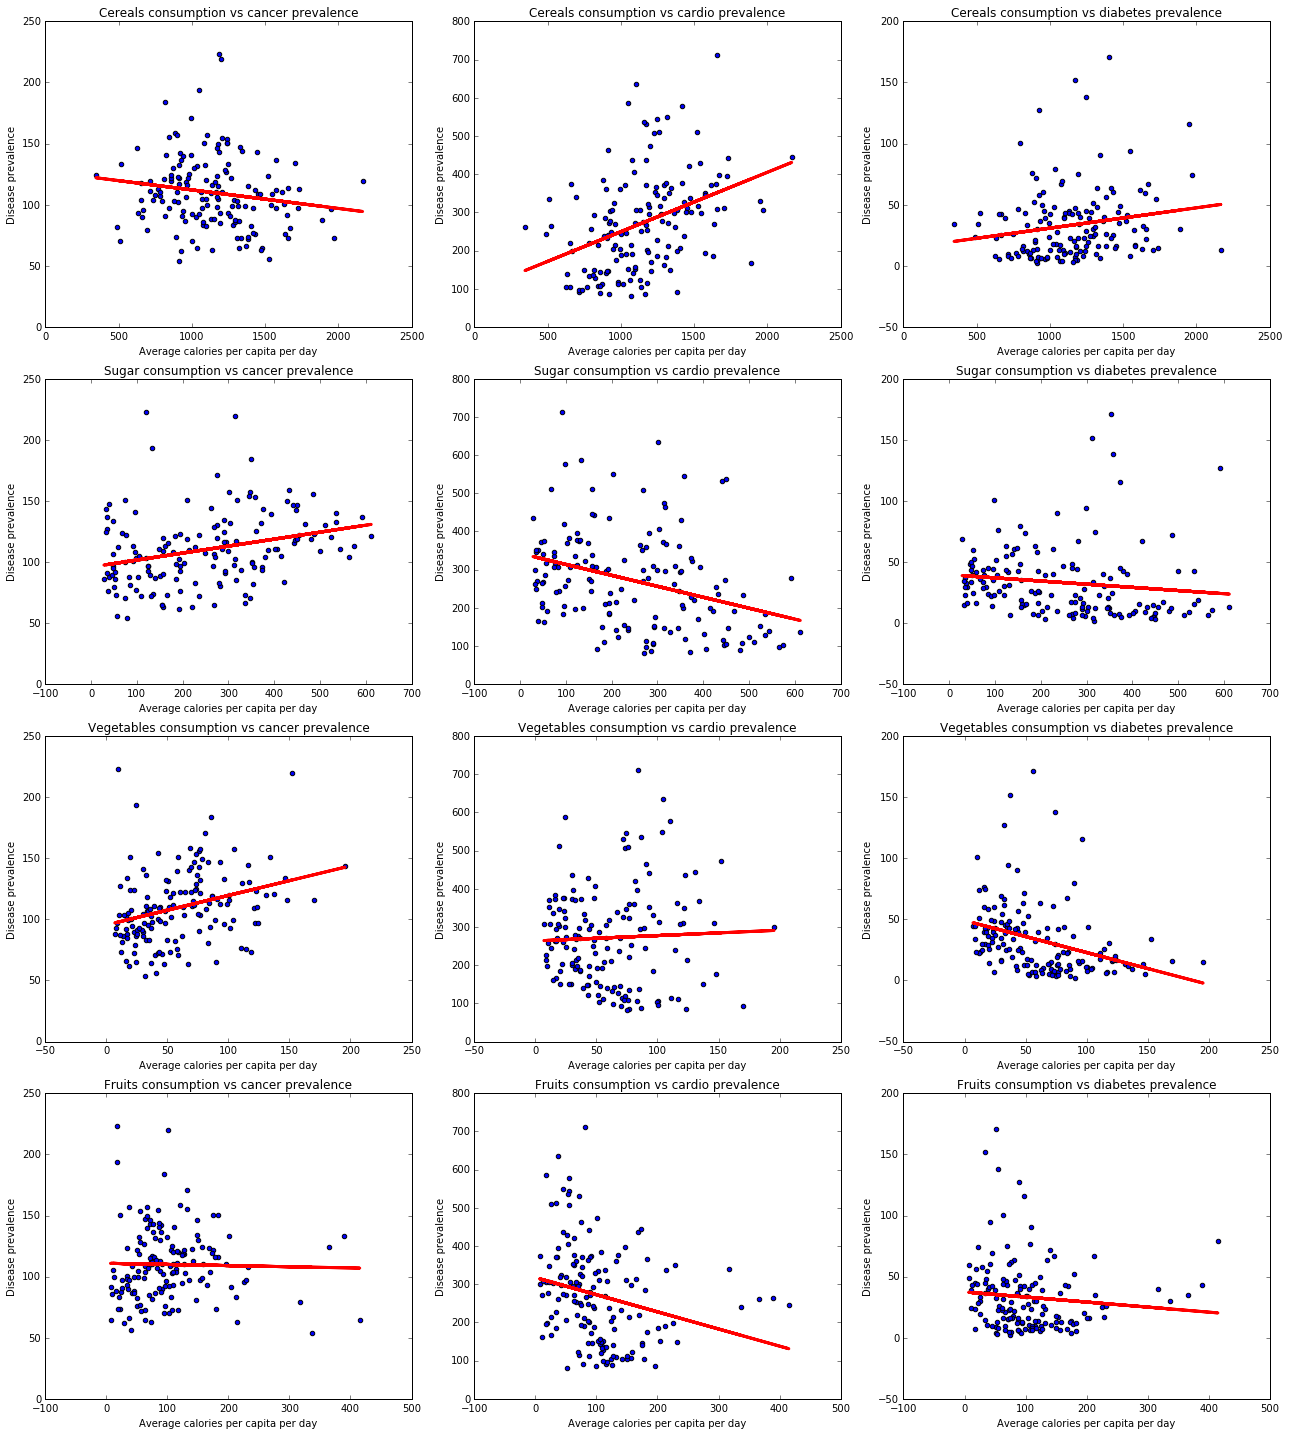

In [19]:
### investigate why iso is appearing here

fig, ax = plt.subplots(4, 3, figsize = (18, 20))

for d in diseases:
    for group in select_groups:
        x = locals()["cal_"+str(d)+"_"+str(group)][[5]]
        y = locals()["cal_"+str(d)+"_"+str(group)][[8]]
        
        reg = Lin_Reg()
        reg.fit(x, y)
        y_hat = reg.predict(x)
        
        ax[select_groups.index(group), diseases.index(d)].scatter(x, y, c='b')
        ax[select_groups.index(group), diseases.index(d)].plot(x, y_hat, c='r', linewidth=3.0)
        ax[select_groups.index(group), diseases.index(d)].set_title(str(group)+" consumption vs "+str(d)+" prevalence")
        ax[select_groups.index(group), diseases.index(d)].set_xlabel('Average calories per capita per day')
        ax[select_groups.index(group), diseases.index(d)].set_ylabel('Disease prevalence')
        ax[select_groups.index(group), diseases.index(d)].legend(loc='best')
        
plt.tight_layout()
plt.show()        

In [23]:
###----------Part 2: Merging with GDP Data [ work in progress to refine] ----------###

# GDP per capita data
df_gdppc = pd.read_csv('/Users/semiraykasoolu/Google Drive/You are what you eat/data/WDI_GDPpc2.csv', delimiter=',')
df_gdppc.columns = map(str.lower, df_gdppc.columns)
df_gdppc = df_gdppc.rename(columns = {'countryname':'country'})
print "GDP per capita, PPP (constant 2011 international $)"
#print df_gdppc.shape
#df_gdppc.head()


#merge disease data
data_diseases = pd.merge(df_gdppc, df_cancer, how="outer", on=['country', 'year'], indicator = True)
data_diseases = data_diseases.rename(columns = {'_merge':'_merge1'})
data_diseases = pd.merge(data_diseases, df_cardio, how="outer", on=['country', 'year'],indicator=True)
data_diseases = data_diseases.rename(columns = {'_merge':'_merge2'})
data_diseases = pd.merge(data_diseases, df_diabetes, how="outer", on=['country', 'year'], indicator=True)

#now it's adding years other than 2012 and 2010
#x=data_diseases[(data_diseases["_merge"]=="both" & data_diseases_2012["_merge1"]=="both" & data_diseases_2012["_merge2"]=="both" )
#data_diseases.head()

GDP per capita, PPP (constant 2011 international $)


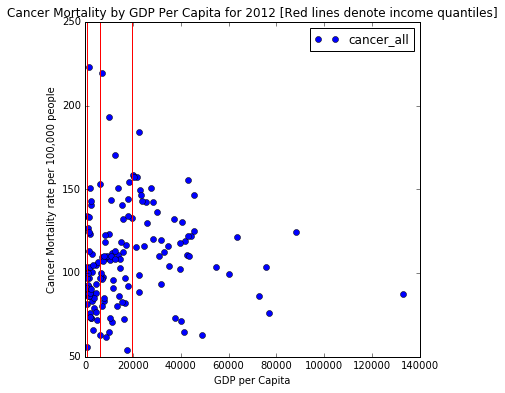

In [29]:
#Plot of disease and income quartiles [not included in the milestone but will be used in the future]
#scatter plotting income and cancer_all for 2012 with red lines on income quartile
#to refine the graph - 1) we will ensure the merged data for 2012 is crosschecked and correct 2) and we will
#cut outliers from the graphs to refine the fit and trends 

#cancer vs gdp per capita
data_diseases_2012=data_diseases[data_diseases["year"]==2012]
y=data_diseases_2012["cancer_all"]
x=data_diseases_2012["ny_gdp_pcap_pp_kd"]

x1=x.values
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0])
perc = mlab.prctile(x1, p=p)

fig, ax = plt.subplots(1,1, figsize=(6, 6))
plt.plot(x, y, 'o', c="b")

#add red lines for income quantiles
for i in perc:
    plt.axvline(x=i, linewidth=1, c="r")

plt.xlabel('GDP per Capita')
plt.ylabel('Cancer Mortality rate per 100,000 people')
plt.title('Cancer Mortality by GDP Per Capita for 2012 [Red lines denote income quantiles]')
plt.legend(loc='best')  

plt.show()

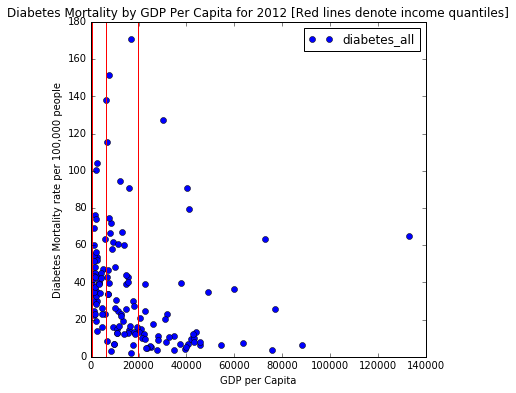

In [27]:
#diabetes vs gdp per capita

y=data_diseases_2012["diabetes_all"]
x=data_diseases_2012["ny_gdp_pcap_pp_kd"]

x1=x.values
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0])
perc = mlab.prctile(x1, p=p)

fig, ax = plt.subplots(1,1, figsize=(6, 6))
plt.plot(x, y, 'o', c="b")

#add red lines for income quantiles
for i in perc:
    plt.axvline(x=i, linewidth=1, c="r")

plt.xlabel('GDP per Capita')
plt.ylabel('Diabetes Mortality rate per 100,000 people')
plt.title('Diabetes Mortality by GDP Per Capita for 2012 [Red lines denote income quantiles]')
plt.legend(loc='best')  

plt.show()

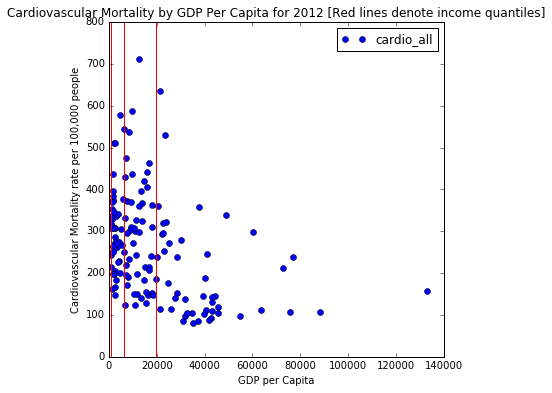

In [30]:
#cardio vs gdp per capita

y=data_diseases_2012["cardio_all"]
x=data_diseases_2012["ny_gdp_pcap_pp_kd"]

x1=x.values
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0])
perc = mlab.prctile(x1, p=p)

fig, ax = plt.subplots(1,1, figsize=(6, 6))
plt.plot(x, y, 'o', c="b")

#add red lines for income quantiles
for i in perc:
    plt.axvline(x=i, linewidth=1, c="r")

plt.xlabel('GDP per Capita')
plt.ylabel('Cardiovascular Mortality rate per 100,000 people')
plt.title('Cardiovascular Mortality by GDP Per Capita for 2012 [Red lines denote income quantiles]')
plt.legend(loc='best')  

plt.show()

In [34]:
###----------Part 3: MAPPING  ----------###
#PART 3.A CANCER
import plotly.plotly as py
py.sign_in('Semiray', '86y7w4kfh1')

data = [ dict(
        type = 'choropleth',
        locations = df_cancer_2012['iso'],
        z = df_cancer_2012['cancer_all'],
        text = df_cancer_2012['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Cancer Mortality All'),
      ) ]

layout = dict(
    title = '2012 Cancer Mortality Rate Source: WHO',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Semiray/0 or inside your plot.ly account where it is named 'd3-world-map'


In [35]:
#PART 3.B DIABETES
import plotly.plotly as py
py.sign_in('Semiray', '86y7w4kfh1')

data = [ dict(
        type = 'choropleth',
        locations = df_diabetes_2012['iso'],
        z = df_diabetes_2012['diabetes_all'],
        text = df_diabetes_2012['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Diabetes Mortality All'),
      ) ]

layout = dict(
    title = '2012 Diabetes Mortality Rate Source: WHO',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Semiray/0 or inside your plot.ly account where it is named 'd3-world-map'


In [36]:
#PART 3.C CARDIOVASCULAR
import plotly.plotly as py
py.sign_in('Semiray', '86y7w4kfh1')

data = [ dict(
        type = 'choropleth',
        locations = df_cardio_2012['iso'],
        z = df_cardio_2012['cardio_all'],
        text = df_cardio_2012['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = ' Cardiovascular Mortality All'),
      ) ]

layout = dict(
    title = '2012  Cardiovascular Mortality Rate Source: WHO',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )


High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Semiray/0 or inside your plot.ly account where it is named 'd3-world-map'


In [44]:
#PART 3.D SUGAR CONSUMPTION
#newly added consumption map per food type - was not included in mileston 3 but may be used going forward

import plotly.plotly as py
py.sign_in('Semiray', '86y7w4kfh1')

data = [ dict(
        type = 'choropleth',
        locations = cal_cancer_Sugar['iso'],
        z = cal_cancer_Sugar["Value"],
        text = cal_cancer_Sugar['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = ' Calorie per day sugar consumption [average 2001-2011]'),
      ) ]

layout = dict(
    title = 'Average Sugar Consumption 2001-2012',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )


High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Semiray/0 or inside your plot.ly account where it is named 'd3-world-map'


In [45]:
#PART 3.E VEGETABLES CONSUMPTION
#newly added consumption map per food type - was not included in mileston 3 but may be used going forward

import plotly.plotly as py
py.sign_in('Semiray', '86y7w4kfh1')

data = [ dict(
        type = 'choropleth',
        locations = cal_cancer_Vegetables['iso'],
        z = cal_cancer_Vegetables["Value"],
        text = cal_cancer_Vegetables['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = ' Calorie per day vegetable consumption [average 2001-2011]'),
      ) ]

layout = dict(
    title = 'Average Vegetable Consumption 2001-2012',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )


High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Semiray/0 or inside your plot.ly account where it is named 'd3-world-map'


In [46]:
#PART 3.F FRUITS CONSUMPTION
#newly added consumption map per food type - was not included in mileston 3 but may be used going forward

import plotly.plotly as py
py.sign_in('Semiray', '86y7w4kfh1')

data = [ dict(
        type = 'choropleth',
        locations = cal_cancer_Fruits['iso'],
        z = cal_cancer_Fruits["Value"],
        text = cal_cancer_Fruits['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = ' Calorie per day fruits consumption [average 2001-2011]'),
      ) ]

layout = dict(
    title = 'Average Fruits Consumption 2001-2012',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Semiray/0 or inside your plot.ly account where it is named 'd3-world-map'


In [47]:
#PART 3.G CEREALS CONSUMPTION
#newly added consumption map per food type - was not included in mileston 3 but may be used going forward

import plotly.plotly as py
py.sign_in('Semiray', '86y7w4kfh1')

data = [ dict(
        type = 'choropleth',
        locations = cal_cancer_Cereals['iso'],
        z = cal_cancer_Cereals["Value"],
        text = cal_cancer_Cereals['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = ' Calorie per day cereals consumption [average 2001-2011]'),
      ) ]

layout = dict(
    title = 'Average Cereals Consumption 2001-2012',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Semiray/0 or inside your plot.ly account where it is named 'd3-world-map'


In [ ]:
#PART 4 BUBBLES

